In [1]:
%pwd
%matplotlib inline
# neccasary packages are loaded
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import zipfile
from IPython.display import display, Markdown
from ast import literal_eval
import calendar
from wordcloud import WordCloud
import nltk
nltk.download('brown')

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.


True

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Dataset cleaning and processing
Lets start and load the dataset.

Few words about it:

The RecipeNLG dataset (Poznań University of Technology) is an expansion of the Recipe1M+ dataset, offering a significantly larger selection of recipes. Unlike its predecessor, this dataset does not prioritize linking cooking instructions with their corresponding images and instead emphasizes the recipe text, structure, and logic. This updated collection contains over one million newly preprocessed and deduplicated recipes, making it the largest publicly accessible dataset in its field.

The data could be downloaded from Poznań University of Technology website.

In [4]:
df = pd.read_csv(Path("/content/drive/MyDrive/capstone/full_dataset.csv"),
                 converters={"ingredients": literal_eval, "directions": literal_eval, "NER":literal_eval})

List of columns


In [5]:
df.columns

Index(['Unnamed: 0', 'title', 'ingredients', 'directions', 'link', 'source',
       'NER'],
      dtype='object')

The dataset consists of 7 columns:

id (int): ID.
title (str): Title of the recipe.
ingredients (list of str): Ingredients.
directions (list of str): Instruction steps.
link (str): URL link.
source (ClassLabel): Origin of each recipe record, with possible value {"Gathered", "Recipes1M"}:
"Gathered" (0): Additional recipes gathered from multiple cooking web pages using automated scripts in a web scraping process.
"Recipes1M" (1): Recipes from the "Recipe1M+" dataset.

Data structure

In [6]:
df.head(10)

,Unnamed: 0,title,ingredients,directions,link,source,NER
0,0,No-Bake Nut Cookies,"[1 c. firmly packed brown sugar, 1/2 c. evapor...","[In a heavy 2-quart saucepan, mix brown sugar,...",www.cookbooks.com/Recipe-Details.aspx?id=44874,Gathered,"[brown sugar, milk, vanilla, nuts, butter, bit..."
1,1,Jewell Ball'S Chicken,"[1 small jar chipped beef, cut up, 4 boned chi...","[Place chipped beef on bottom of baking dish.,...",www.cookbooks.com/Recipe-Details.aspx?id=699419,Gathered,"[beef, chicken breasts, cream of mushroom soup..."
2,2,Creamy Corn,"[2 (16 oz.) pkg. frozen corn, 1 (8 oz.) pkg. c...","[In a slow cooker, combine all ingredients. Co...",www.cookbooks.com/Recipe-Details.aspx?id=10570,Gathered,"[frozen corn, cream cheese, butter, garlic pow..."
3,3,Chicken Funny,"[1 large whole chicken, 2 (10 1/2 oz.) cans ch...","[Boil and debone chicken., Put bite size piece...",www.cookbooks.com/Recipe-Details.aspx?id=897570,Gathered,"[chicken, chicken gravy, cream of mushroom sou..."
4,4,Reeses Cups(Candy),"[1 c. peanut butter, 3/4 c. graham cracker cru...",[Combine first four ingredients and press in 1...,www.cookbooks.com/Recipe-Details.aspx?id=659239,Gathered,"[peanut butter, graham cracker crumbs, butter,..."
5,5,Cheeseburger Potato Soup,"[6 baking potatoes, 1 lb. of extra lean ground...",[Wash potatoes; prick several times with a for...,www.cookbooks.com/Recipe-Details.aspx?id=20115,Gathered,"[baking potatoes, extra lean ground beef, butt..."
6,6,Rhubarb Coffee Cake,"[1 1/2 c. sugar, 1/2 c. butter, 1 egg, 1 c. bu...","[Cream sugar and butter., Add egg and beat wel...",www.cookbooks.com/Recipe-Details.aspx?id=210288,Gathered,"[sugar, butter, egg, buttermilk, flour, salt, ..."
7,7,Scalloped Corn,"[1 can cream-style corn, 1 can whole kernel co...","[Mix together both cans of corn, crackers, egg...",www.cookbooks.com/Recipe-Details.aspx?id=876969,Gathered,"[cream-style corn, whole kernel corn, crackers..."
8,8,Nolan'S Pepper Steak,"[1 1/2 lb. round steak (1-inch thick), cut int...","[Roll steak strips in flour., Brown in skillet...",www.cookbooks.com/Recipe-Details.aspx?id=375254,Gathered,"[tomatoes, water, onions, Worcestershire sauce..."
9,9,Millionaire Pie,"[1 large container Cool Whip, 1 large can crus...","[Empty Cool Whip into a bowl., Drain juice fro...",www.cookbooks.com/Recipe-Details.aspx?id=794547,Gathered,"[pineapple, condensed milk, lemons, pecans, gr..."


In [7]:
df.rename(columns={'Unnamed: 0': 'ID','directions': 'procedure', 'title': 'name'},inplace=True, errors='raise')

In [ ]:
df.head()

,ID,name,ingredients,procedure,link,source,NER
0,0,No-Bake Nut Cookies,"[1 c. firmly packed brown sugar, 1/2 c. evapor...","[In a heavy 2-quart saucepan, mix brown sugar,...",www.cookbooks.com/Recipe-Details.aspx?id=44874,Gathered,"[brown sugar, milk, vanilla, nuts, butter, bit..."
1,1,Jewell Ball'S Chicken,"[1 small jar chipped beef, cut up, 4 boned chi...","[Place chipped beef on bottom of baking dish.,...",www.cookbooks.com/Recipe-Details.aspx?id=699419,Gathered,"[beef, chicken breasts, cream of mushroom soup..."
2,2,Creamy Corn,"[2 (16 oz.) pkg. frozen corn, 1 (8 oz.) pkg. c...","[In a slow cooker, combine all ingredients. Co...",www.cookbooks.com/Recipe-Details.aspx?id=10570,Gathered,"[frozen corn, cream cheese, butter, garlic pow..."
3,3,Chicken Funny,"[1 large whole chicken, 2 (10 1/2 oz.) cans ch...","[Boil and debone chicken., Put bite size piece...",www.cookbooks.com/Recipe-Details.aspx?id=897570,Gathered,"[chicken, chicken gravy, cream of mushroom sou..."
4,4,Reeses Cups(Candy),"[1 c. peanut butter, 3/4 c. graham cracker cru...",[Combine first four ingredients and press in 1...,www.cookbooks.com/Recipe-Details.aspx?id=659239,Gathered,"[peanut butter, graham cracker crumbs, butter,..."


Setting the types


In [8]:
df = df.astype({'ID': int,
                'name': str,
                'ingredients': 'object',
                'procedure': 'object',
                'link': str,
                'source': 'category',
                'NER': 'object'})

Adding extra columns
The variations in ingredients and their quantities across recipes, as well as the number of steps in each recipe, are of interest.

In [9]:
df['n_NER'] = df['NER'].apply(len)
df['n_procedures'] = df['procedure'].apply(len)

In [ ]:
df.head()

,ID,name,ingredients,procedure,link,source,NER,n_NER,n_procedures
0,0,No-Bake Nut Cookies,"[1 c. firmly packed brown sugar, 1/2 c. evapor...","[In a heavy 2-quart saucepan, mix brown sugar,...",www.cookbooks.com/Recipe-Details.aspx?id=44874,Gathered,"[brown sugar, milk, vanilla, nuts, butter, bit...",6,6
1,1,Jewell Ball'S Chicken,"[1 small jar chipped beef, cut up, 4 boned chi...","[Place chipped beef on bottom of baking dish.,...",www.cookbooks.com/Recipe-Details.aspx?id=699419,Gathered,"[beef, chicken breasts, cream of mushroom soup...",4,3
2,2,Creamy Corn,"[2 (16 oz.) pkg. frozen corn, 1 (8 oz.) pkg. c...","[In a slow cooker, combine all ingredients. Co...",www.cookbooks.com/Recipe-Details.aspx?id=10570,Gathered,"[frozen corn, cream cheese, butter, garlic pow...",6,1
3,3,Chicken Funny,"[1 large whole chicken, 2 (10 1/2 oz.) cans ch...","[Boil and debone chicken., Put bite size piece...",www.cookbooks.com/Recipe-Details.aspx?id=897570,Gathered,"[chicken, chicken gravy, cream of mushroom sou...",4,6
4,4,Reeses Cups(Candy),"[1 c. peanut butter, 3/4 c. graham cracker cru...",[Combine first four ingredients and press in 1...,www.cookbooks.com/Recipe-Details.aspx?id=659239,Gathered,"[peanut butter, graham cracker crumbs, butter,...",5,3


Cleaning empty

First lets copy the df

In [10]:
df_old = df[:]

Cleaning n_NER column

In [11]:
df = df[df['n_NER'] > 0]

Cleaning n_procedures column

In [12]:
df = df[df['n_procedures'] > 0]

Analysis

Unique values for the sources

In [13]:
df['source'].unique()

['Gathered', 'Recipes1M']
Categories (2, object): ['Gathered', 'Recipes1M']

Unique values for the recipes

In [14]:
unique_names = len(df['name'].unique())
number_entries = len(df)
number_entries_old = len(df_old)
display(Markdown(f'Number of all entries: {number_entries:.0f} vs Number of all entries before cleaning: {number_entries_old :.0f}'))
display(Markdown(f'Number of unique names: {unique_names :.0f}'))

Number of all entries: 2230569 vs Number of all entries before cleaning: 2231142

Number of unique names: 1312476

Distribution of number ingridients by sources

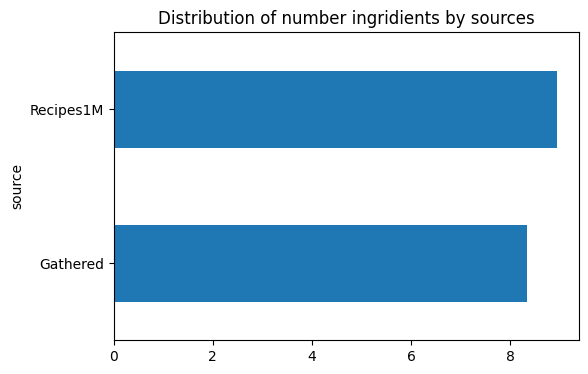

In [15]:
average_n_ingridients = df.groupby('source')['n_NER'].mean()
fig, ax = plt.subplots(figsize=(6, 4))
ax.set_title('Distribution of number ingridients by sources')
average_n_ingridients.plot(kind='barh', stacked=False, ax=ax)
# Show the chart
plt.show()

Distribution of number procedure steps by sources

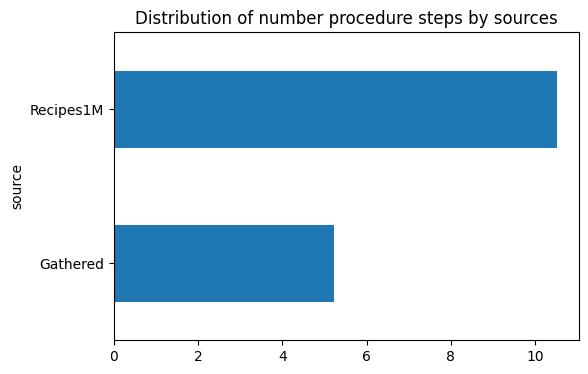

In [16]:
average_n_procedures = df.groupby('source')['n_procedures'].mean()
fig, ax = plt.subplots(figsize=(6, 4))
ax.set_title('Distribution of number procedure steps by sources')
average_n_procedures.plot(kind='barh', stacked=False, ax=ax)
# Show the chart
plt.show()

Ingridients

In [17]:
NER_exploded = df.explode('NER')

List of ingridients

In [18]:
ingridients = NER_exploded['NER']

In [19]:
# get the unique values of the exploded column
unique_NER_values = NER_exploded['NER'].unique()

In [20]:
display(Markdown(f'Number of unique ingridients: {len(unique_NER_values) :.0f}'))

Number of unique ingridients: 234059

In [21]:
print(unique_NER_values[:100])

['brown sugar' 'milk' 'vanilla' 'nuts' 'butter'
 'bite size shredded rice biscuits' 'beef' 'chicken breasts'
 'cream of mushroom soup' 'sour cream' 'frozen corn' 'cream cheese'
 'garlic powder' 'salt' 'pepper' 'chicken' 'chicken gravy'
 'shredded cheese' 'peanut butter' 'graham cracker crumbs'
 'powdered sugar' 'chocolate chips' 'baking potatoes'
 'extra lean ground beef' 'Cheddar cheese' 'bacon' 'green onion' 'sugar'
 'egg' 'buttermilk' 'flour' 'soda' 'rhubarb' 'cream-style corn'
 'whole kernel corn' 'crackers' 'tomatoes' 'water' 'onions'
 'Worcestershire sauce' 'green peppers' 'oil' 'pineapple' 'condensed milk'
 'lemons' 'pecans' 'graham cracker crusts' 'dark sweet pitted cherries'
 'ginger ale' 'flavor gelatin' 'boiling water' 'almond extract'
 'marshmallows' 'paraffin' 'barbecue sauce' 'taco sauce' 'ground beef'
 'taco seasoning' 'shredded lettuce' 'tomato' 'onion' 'green pepper'
 'pie filling' 'lemon juice' 'shell' 'cleaned strawberries' 'cornstarch'
 'strawberry jello' 'chocolate

There is an issue with the data, as it contains inconsistent naming conventions. For instance, "apples" should be "apple", and different types of cheese should be grouped into a single "cheese" category.

World cloud of ingridients

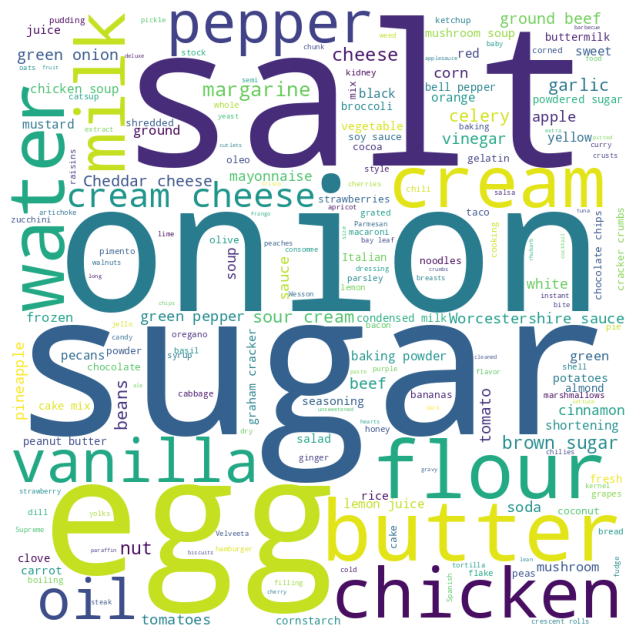

In [22]:
# Generate the word cloud
wordcloud = WordCloud(width=800, height=800, background_color='white').generate(' '.join(ingridients[:1000]))

# Display the word cloud using matplotlib
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

World cloud of unique ingridients

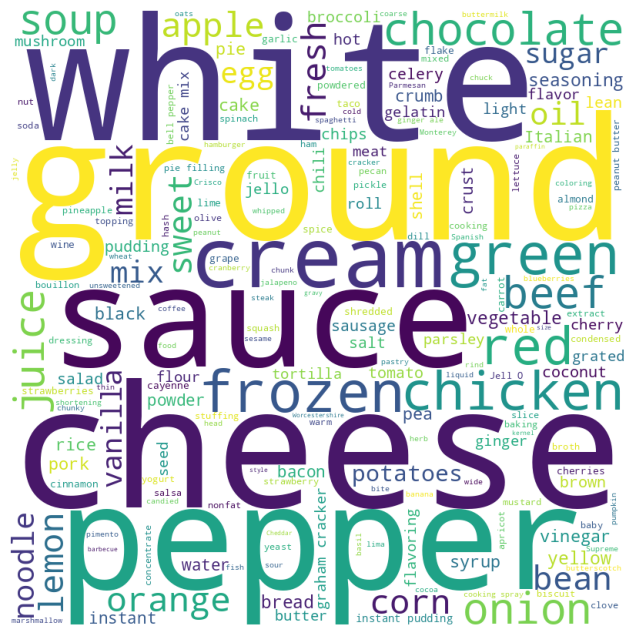

In [23]:
# Generate the word cloud
wordcloud = WordCloud(width=800, height=800, background_color='white').generate(' '.join(unique_NER_values[:1000]))

# Display the word cloud using matplotlib
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [24]:
import pandas as pd
from wordcloud import WordCloud

def minimal_wordcloud(df, column):
    """
    Generate a simple wordcloud similar to:
    https://amueller.github.io/word_cloud/auto_examples/simple.html.
    The only import required is: from wordcloud import WordCloud
    """
    text = str(df[column].values)
    wordcloud = WordCloud().generate(text)
    image = wordcloud.to_image()
    return image

In [26]:
recipe_df = pd.read_csv('/content/drive/MyDrive/capstone/full_dataset.csv')
print('Number of recipes in dataset: ', len(recipe_df))
print('First 25 recipes:')
recipe_df[['title','directions','NER']].head(25)

Number of recipes in dataset:  2231142
First 25 recipes:


,title,directions,NER
0,No-Bake Nut Cookies,"[""In a heavy 2-quart saucepan, mix brown sugar...","[""brown sugar"", ""milk"", ""vanilla"", ""nuts"", ""bu..."
1,Jewell Ball'S Chicken,"[""Place chipped beef on bottom of baking dish....","[""beef"", ""chicken breasts"", ""cream of mushroom..."
2,Creamy Corn,"[""In a slow cooker, combine all ingredients. C...","[""frozen corn"", ""cream cheese"", ""butter"", ""gar..."
3,Chicken Funny,"[""Boil and debone chicken."", ""Put bite size pi...","[""chicken"", ""chicken gravy"", ""cream of mushroo..."
4,Reeses Cups(Candy),"[""Combine first four ingredients and press in ...","[""peanut butter"", ""graham cracker crumbs"", ""bu..."
5,Cheeseburger Potato Soup,"[""Wash potatoes; prick several times with a fo...","[""baking potatoes"", ""extra lean ground beef"", ..."
6,Rhubarb Coffee Cake,"[""Cream sugar and butter."", ""Add egg and beat ...","[""sugar"", ""butter"", ""egg"", ""buttermilk"", ""flou..."
7,Scalloped Corn,"[""Mix together both cans of corn, crackers, eg...","[""cream-style corn"", ""whole kernel corn"", ""cra..."
8,Nolan'S Pepper Steak,"[""Roll steak strips in flour."", ""Brown in skil...","[""tomatoes"", ""water"", ""onions"", ""Worcestershir..."
9,Millionaire Pie,"[""Empty Cool Whip into a bowl."", ""Drain juice ...","[""pineapple"", ""condensed milk"", ""lemons"", ""pec..."


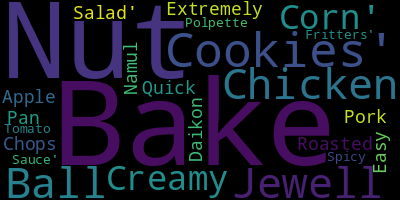

In [27]:
minimal_wordcloud(recipe_df,'title')

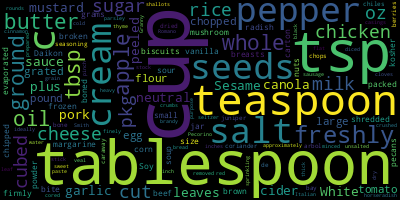

In [28]:
minimal_wordcloud(recipe_df,'ingredients')

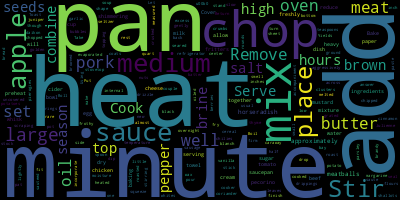

In [29]:
minimal_wordcloud(recipe_df,'directions')

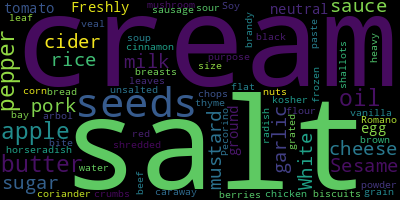

In [30]:
minimal_wordcloud(recipe_df,'NER')

In [ ]:
!mkdir /kaggle/working/docker/
!pip freeze > '/kaggle/working/docker/requirements.txt'
print('This notebook makes use of \nthe following Python libraries:\n')
import pandas
print('pandas:',pandas.__version__)
import wordcloud
print('wordcloud:',wordcloud.__version__)
recipe_df.to_csv('recipe_df.csv',index=False)

mkdir: cannot create directory '/kaggle/working/docker/': File exists
This notebook makes use of 
the following Python libraries:

pandas: 2.0.3
wordcloud: 1.9.2


In [ ]:
# Get the number of rows and columns
num_rows = recipe_df.shape[0]
num_columns = recipe_df.shape[1]

print("Number of rows:", num_rows)
print("Number of columns:", num_columns)

Number of rows: 2231142
Number of columns: 7


In [ ]:
# Take a random sample of the DataFrame
sample_df = recipe_df.sample(n=500)  # Change the 'n' value to the desired sample size

# Save the sampled data to a new CSV file
sample_df.to_csv('/kaggle/working/sample_recipe.csv', index=False)
print(sample_df)

         Unnamed: 0                                              title  \
597081       597081                                   Oreo Cookie Cake   
753898       753898        Lilias Upton'S Prize Winning English Toffee   
152829       152829                              Quick Chili Con Carne   
2134788     2134788         Sauted Potatoes and Roasted Chicken Breast   
365991       365991                                          Dump Cake   
...             ...                                                ...   
1876852     1876852                        Cheesy Broccoli-Potato Mash   
582611       582611                                     Zucchini Bread   
623905       623905                                   French Drip Beef   
1996565     1996565                                        Whoopie Pie   
1730542     1730542  Tofu and Cheese Savory Pancakes with Bean Spro...   

                                               ingredients  \
597081   ["1 stick butter, softened", "28 Oreos, 